# guia EDA con Python

En este cuaderno, examinaremos los datos de los rayos recopilados por la Administración Nacional Oceánica y Atmosférica (NOAA, por sus siglas en inglés) para el año 2018. Para completar este cuaderno, haremos lo siguiente:

* Encontraremos las ubicaciones con el mayor número de rayos en un solo día.
* Examinaremos las ubicaciones que tuvieron el mayor número de días con al menos un rayo.
* Determinaremos si ciertos días de la semana tuvieron más rayos que otros.
* Agregaremos datos de 2016 y 2017 y, para cada mes, calcularemos el porcentaje de rayos totales para ese año que ocurrieron en ese mes.
* Representaremos estos datos en un gráfico de barras.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('eda_structuring_with_python_dataset1.csv') 
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [4]:
df.dtypes

date                 object
number_of_strikes     int64
center_point_geom    object
dtype: object

Este conjunto de datos tiene tres columnas:  `date` ,  `number_of_strikes`  y  `center_point_geom` . Comienzamos por convertir la columna  `date`  a formato datetime.

In [5]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date']) 
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [6]:
df.dtypes

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
dtype: object

In [7]:
df.shape

(3401012, 3)

Verifica duplicados. Si la forma de los datos es diferente después de ejecutar este código, sabrás que había filas duplicadas.

In [8]:
df.duplicated().value_counts()

False    3401012
dtype: int64

In [9]:
df.drop_duplicates().shape

(3401012, 3)

La forma del conjunto de datos después de eliminar los duplicados es la misma, por lo que puedes asumir que no hay duplicados. Por lo tanto, hay como máximo una fila por fecha, por área y por número de huelgas.

## Cambio de nombres de las columnas

In [10]:
df.columns

Index(['date', 'number_of_strikes', 'center_point_geom'], dtype='object')

In [11]:
columnas = ["fecha", "rayos", "coordenadas"]
df.columns = columnas
df

,fecha,rayos,coordenadas
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
...,...,...,...
3401007,2018-12-28,30,POINT(-90.6 28.7)
3401008,2018-12-28,30,POINT(-89.4 30.9)
3401009,2018-12-28,30,POINT(-89.5 31.4)
3401010,2018-12-28,30,POINT(-88.3 31.6)


### Ubicaciones con la mayor cantidad de rayos en un solo día

Para identificar las ubicaciones con la mayor cantidad de huelgas en un solo día, ordenaremos la columna  `number_of_strikes`  de forma descendente, es decir, de mayor a menor cantidad de huelgas.

In [12]:
# Oedenamos por numeros de rayos en orden descendente.
df.sort_values(by='rayos', ascending=False).head(10)

,fecha,rayos,coordenadas
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


Ubicaciones con la mayoría de los días con al menos un rayo eléctrico.



Para encontrar el número de días en los que una ubicación geográfica determinada tuvo al menos un rayo, utilizaremos la función  `value_counts()`  en la columna  `coordenadas` . La lógica es que si cada fila representa una ubicación-día, contar la cantidad de veces que aparece cada ubicación en los datos te dará el número de días en los que esa ubicación tuvo rayos.

In [13]:
# Idintificar los puntos donde se registraron los rayos
df.coordenadas.value_counts()

POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: coordenadas, Length: 170855, dtype: int64

Las ubicaciones con la mayor cantidad de días con rayos tuvieron al menos un rayo en 108 días, casi uno de cada tres días del año. Estas ubicaciones están bastante cerca geográficamente entre sí. Observa también que la función  `value_counts()`  ordena automáticamente los resultados en orden descendente.

Ahora examinaremos si hay una distribución uniforme de valores o si 108 rayos es un número inusualmente alto de días con rayos. Utilizaremos nuevamente la función  `value_counts()` , pero esta vez mostraremos los 20 resultados principales. También cambiaremos el nombre de las columnas y aplicaremos un gradiente de color.

In [14]:
print(dir(df.style))

['__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_apply_index', '_applymap', '_check_trim', '_compute', '_copy', '_display_funcs', '_display_funcs_columns', '_display_funcs_index', '_generate_body_row', '_generate_col_header_row', '_generate_index_names_row', '_generate_trimmed_row', '_get_numeric_subset_default', '_render', '_render_html', '_render_latex', '_render_string', '_repr_html_', '_repr_latex_', '_todo', '_translate', '_translate_body', '_translate_header', '_translate_latex', '_update_ctx', '_update_ctx_header', 'apply', 'apply_index', 'applymap', 'applymap_index', 'background_gradient', 'bar', 'caption', 'cell_context', 'cell_ids', 'clear', 'col

In [15]:
# Identify the top 20 locations with most days of lightning.
df.coordenadas.value_counts()[:20]\
    .rename_axis('valores_unicos')\
    .reset_index(name='cantidad')\
    .style.background_gradient(cmap="Purples")

,valores_unicos,cantidad
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


### Rayos por día de la semana

Una agrupación útil es categorizar los rayos por día de la semana, lo cual nos dirá si algún día en particular tuvo menos o más rayos que los demás. Para calcular esto, aprovecharemos el hecho de que los datos en nuestra columna  `fecha`  son de la clase  `datetime` . Debido a que estas entradas son objetos datetime, podemos extraer información relacionada con la fecha de ellos y crear nuevas columnas.

Primero, crearemos una columna llamada  `semana`  utilizando  `dt.isocalendar()`  en la columna  `fecha` . Esta función está diseñada para ser utilizada en una serie de pandas, y devolverá un nuevo DataFrame con columnas de año, semana y día. La información se formatea numéricamente; por ejemplo, el 3 de enero de 1950 se representaría como:

| Año  | Semana | Día |
| ---- | :----: | :-: |
| 1950 |   1    |  3  |

Dado que solo queremos extraer el número de semana, agregaremos  `.week`  al final. Puedes obtener más información sobre  `dt.isocalendar()`  en la [documentación de pandas.Series.dt.isocalendar](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.isocalendar.html).

También agregaremos una columna  `dia`  utilizando  `dt.day_name()` . Esta es otra función de pandas diseñada para ser utilizada en una serie de pandas. Extrae el nombre del día en formato de texto para cualquier fecha datetime dada. Puedes obtener más información sobre esta función en la [documentación de pandas.Series.dt.day_name](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.day_name.html).


In [16]:
# Create two new columns.
df['semana'] = df.fecha.dt.isocalendar().week
df['dia'] = df.fecha.dt.day_name(locale="es_ES.UTF-8")
df.head()

,fecha,rayos,coordenadas,semana,dia
0,2018-01-03,194,POINT(-75 27),1,Miércoles
1,2018-01-03,41,POINT(-78.4 29),1,Miércoles
2,2018-01-03,33,POINT(-73.9 27),1,Miércoles
3,2018-01-03,38,POINT(-73.8 27),1,Miércoles
4,2018-01-03,92,POINT(-79 28),1,Miércoles


In [17]:
# metodo personalizado para cambiar los dias
def dias_catalan(st):
    dias ={
    "Lunes"     :"Dilluns",
    "Martes"    :"Dimarts",
    "Miércoles" :"Dimecres",
    "Jueves"    :"Dijous",
    "Viernes"   :"Divendres",
    "Sábado"    :"Dissabte",
    "Domingo"   :"Diumenge",
    }
    return dias[st]

df["dias_catalan"] = df.dia.apply(dias_catalan)
df.sample(10)

,fecha,rayos,coordenadas,semana,dia,dias_catalan
2821231,2018-08-29,9,POINT(-88.8 25.7),35,Miércoles,Dimecres
3125257,2018-08-16,15,POINT(-107.7 39.9),33,Jueves,Dijous
909019,2018-07-28,1,POINT(-91.1 49.7),30,Sábado,Dissabte
759449,2018-07-02,1,POINT(-97.9 50.7),27,Lunes,Dilluns
895414,2018-07-26,1,POINT(-111.9 36.7),30,Jueves,Dijous
2504965,2018-08-22,6,POINT(-99.6 23.2),34,Miércoles,Dimecres
2394657,2018-03-20,6,POINT(-80.5 34.2),12,Martes,Dimarts
2194265,2018-09-01,4,POINT(-91.1 31.4),35,Sábado,Dissabte
2021743,2018-10-06,3,POINT(-92 37.9),40,Sábado,Dissabte
1650234,2018-10-30,2,POINT(-108.3 35.4),44,Martes,Dimarts


Borramos la columna que creamos con el metodo drop

In [18]:
df.drop("dias_catalan", axis = 1, inplace = True) # axis = 1 es para columnas axis = 0 para filas

ejemplo de como borrar una fila especifica 

In [19]:
df.drop(0, axis = 0,) # se elimina la fila con indice 0 

,fecha,rayos,coordenadas,semana,dia
1,2018-01-03,41,POINT(-78.4 29),1,Miércoles
2,2018-01-03,33,POINT(-73.9 27),1,Miércoles
3,2018-01-03,38,POINT(-73.8 27),1,Miércoles
4,2018-01-03,92,POINT(-79 28),1,Miércoles
5,2018-01-03,119,POINT(-78 28),1,Miércoles
...,...,...,...,...,...
3401007,2018-12-28,30,POINT(-90.6 28.7),52,Viernes
3401008,2018-12-28,30,POINT(-89.4 30.9),52,Viernes
3401009,2018-12-28,30,POINT(-89.5 31.4),52,Viernes
3401010,2018-12-28,30,POINT(-88.3 31.6),52,Viernes


Ahora podemos calcular el promedio del número de rayos para cada día de la semana del año. Utilizaremos la función  `groupby()`  para hacer esto.

In [20]:
# Calcula el promedio del número de rayos para cada día de la semana.
df[['dia','rayos']].groupby(['dia']).mean()

,rayos
dia,
Domingo,12.324717
Jueves,13.240594
Lunes,13.152804
Martes,13.813599
Miércoles,13.224568
Sábado,12.732694
Viernes,13.349972


Parece que los sábados y domingos tienen menos rayos en promedio que los otros cinco días de la semana. Graficaremos las distribuciones del número de rayos para cada día de la semana. Queremos que cada distribución se represente como un diagrama de caja.

Comenzaremos definiendo el orden de los días, comenzando con el lunes y terminando con el domingo. Así es como se ordenarán los días en el gráfico que crearemos.

In [53]:
# creamos una lista desde un string para ordenar el grafico
# con title pasamos el string en formato titulo (primer caracter de cada palabra en mayuscula)
# con split separamos por el espacio y nos devuelve una lista
orden_dias = "lunes martes miércoles jueves viernes sábado domingo".title().split()
orden_mes = "enero febrero marzo abril mayo junio julio agosto octubre septiembre noviembre diciembre".title().split()
print(orden_dias)
print(orden_mes)  


['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Octubre', 'Septiembre', 'Noviembre', 'Diciembre']


Ahora, codificaremos el gráfico. Recuerda que  `showfliers`  es el parámetro que controla si se muestran o no los valores atípicos en el gráfico. Si ingresamos  `True` , se incluyen los valores atípicos; si ingresamos  `False` , se omiten del diagrama de caja. Ten en cuenta que no estamos *eliminando* ningún valor atípico del conjunto de datos al crear este gráfico, solo los excluimos de la visualización.

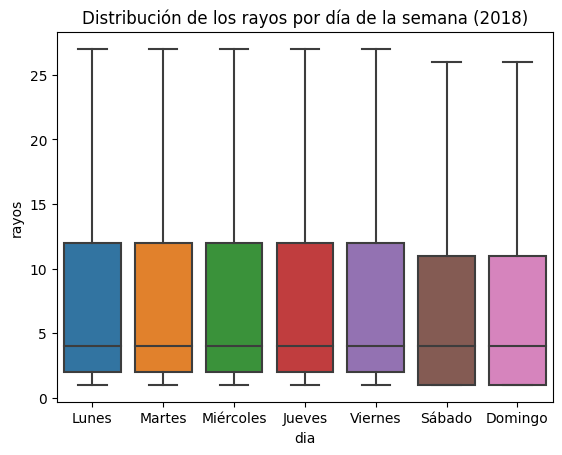

In [22]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='dia',
            y='rayos', 
            order=orden_dias, 
            showfliers=False 
            )
g.set_title('Distribución de los rayos por día de la semana (2018)');

Observa que la mediana se mantiene igual en todos los días de la semana. Sin embargo, en cuanto al sábado y domingo, las distribuciones son *ambas* más bajas que durante el resto de la semana. También sabemos que el número promedio de rayos que ocurrieron los sábados y domingos fue menor que en los otros días laborables. ¿Por qué podría ser esto? Tal vez las partículas de aerosol emitidas por fábricas y vehículos aumenten la probabilidad de los rayos. En los Estados Unidos, el sábado y domingo son días en los que muchas personas no trabajan, por lo que puede haber menos fábricas en funcionamiento y menos autos en la carretera. Esto es solo especulación, pero es una posible vía para una exploración adicional.



Finalmente, examinaremos los datos mensuales de rayos ocurridos entre 2016 y 2018. Calcularemos el porcentaje del total de rayos para cada año que ocurrieron en un mes determinado. Luego representaremos estos datos en un gráfico de barras.

In [23]:
df_2 = pd.read_csv('eda_structuring_with_python_dataset2.csv')
df_2.columns = columnas
df_2.head()

,fecha,rayos,coordenadas
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


In [24]:
df_2.shape

(7077991, 3)

Los datos están en el mismo formato que los datos de 2018 cuando los importamos anteriormente. Ahora, convertiremos la columna  `date`  a datetime.

In [25]:
df_2['fecha'] = pd.to_datetime(df_2['fecha'])

Ahora podemos combinar el dataframe de 2016-2017 con el dataframe de 2018. Hay varias funciones que pueden hacer esto. Utilizaremos  `concat()` . Recuerda que los datos de 2018 tienen dos columnas adicionales:  `semana`  y  `dia` . Para simplificar los resultados de nuestro dataframe combinado, eliminaremos estas columnas adicionales durante la concatenación. Ten en cuenta que el siguiente código no modifica permanentemente  `df` . Las columnas se eliminan solo para esta operación. Puedes obtener más información sobre la función  `concat()`  en la [documentación de pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).

In [26]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['dia','semana'],axis=1), df_2], ignore_index=True)
union_df.head()

,fecha,rayos,coordenadas
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [27]:
union_df.shape

(10479003, 3)

Para ayudarnos a nombrar las barras del gráfico de barras, crearemos tres nuevas columnas que aíslen el año, el número de mes y el nombre del mes.

In [30]:
# Add 3 new columns.
union_df['año']     = union_df.fecha.dt.year
union_df['mes']     = union_df.fecha.dt.month
union_df['mes_txt'] = union_df.fecha.dt.month_name(locale="es_ES.UTF-8")
union_df.head()

,fecha,rayos,coordenadas,año,mes,mes_txt
0,2018-01-03,194,POINT(-75 27),2018,1,Enero
1,2018-01-03,41,POINT(-78.4 29),2018,1,Enero
2,2018-01-03,33,POINT(-73.9 27),2018,1,Enero
3,2018-01-03,38,POINT(-73.8 27),2018,1,Enero
4,2018-01-03,92,POINT(-79 28),2018,1,Enero


Verifiquemos el recuento total de rayos por año.

In [31]:
# calcula el total de rayos por año
union_df[['año','rayos']].groupby(['año']).sum()

,rayos
año,
2016,41582229
2017,35095195
2018,44600989


Ahora calcularemos el porcentaje del total de rayos que ocurrieron en un mes determinado para cada año y asignaremos los resultados a un nuevo dataframe llamado  `rayos_por_meses` .

In [42]:
# Calcula el total de rayos por cada mes de cada año
rayos_por_meses = union_df.groupby(['mes_txt','año']).agg(
    rayos_meses = pd.NamedAgg( column = 'rayos', aggfunc = sum )
    ).reset_index()

print(rayos_por_meses.shape)
rayos_por_meses.head()

(36, 3)


,mes_txt,año,rayos_meses
0,Abril,2016,2636427
1,Abril,2017,3819075
2,Abril,2018,1524339
3,Agosto,2016,7250442
4,Agosto,2017,6021702


El código calcula el total de rayos por cada mes de cada año.

- En la primera línea, se crea un nuevo DataFrame llamado "rayos_por_meses" que agrupa los datos del DataFrame "union_df" por mes y año.
- La función "groupby" agrupa los datos por las columnas 'mes_txt' y 'año'.
- La función "agg" aplica una función de agregación a la columna 'numero_de_rayos', que en este caso es la suma de los valores.
- La función "pd.NamedAgg" se utiliza para dar un nombre a la columna resultante, que se llama 'rayos_meses'.
- Por último, se utiliza la función "reset_index" para reiniciar los índices del DataFrame resultante.


We can use the `agg()` function to calculate the same yearly totals we found before, with 2017 having fewer strikes than the other two years.

In [43]:
# Calculate total lightning strikes for each year.
rayos_por_años = union_df.groupby(['año']).agg(
  rayos_años = pd.NamedAgg(column='rayos',aggfunc=sum)
).reset_index()

rayos_por_años.head()

,año,rayos_años
0,2016,41582229
1,2017,35095195
2,2018,44600989


En nuestro gráfico de barras, necesitamos utilizar los totales mensuales para calcular los porcentajes. Para cada mes, necesitaremos el total mensual de rayos y el total de rayos para ese año. Creemos otro DataFrame llamado  `porcentaje_de_rayos`  que agregue una nueva columna llamada  `rayos_años` , que representa el número total de rayos para cada año. Podemos hacer esto utilizando la función  `merge()` . Vamos a combinar el DataFrame  `rayos_por_meses`  con el DataFrame  `rayos_por_años` , especificando que se combinen en la columna  `año` . Esto significa que donde las columnas  `año`  contengan el mismo valor en ambos DataFrames, se creará una fila en nuestro nuevo DataFrame con todas las demás columnas de ambos DataFrames combinadas. Para obtener más información sobre esta función, consulta la [documentación de pandas.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html).



In [44]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
porcentaje_de_rayos = rayos_por_meses.merge(rayos_por_años,on='año')
porcentaje_de_rayos.head()

,mes_txt,año,rayos_meses,rayos_años
0,Abril,2016,2636427,41582229
1,Agosto,2016,7250442,41582229
2,Diciembre,2016,316450,41582229
3,Enero,2016,313595,41582229
4,Febrero,2016,312676,41582229


Ahora crearemos una nueva columna en nuestro nuevo dataframe que represente el porcentaje total de rayos que ocurrieron durante cada mes para cada año. Haremos esto dividiendo la columna  `rayos_meses`  por la columna  `rayos_años`  y multiplicando el resultado por 100.

In [52]:
# Create new `percentage_lightning_per_month` column.
porcentaje_de_rayos['porcentaje_de_rayos_por_mes'] = round((porcentaje_de_rayos.rayos_meses /
                                                            porcentaje_de_rayos.rayos_años * 100.0),2)

porcentaje_de_rayos.head()

,mes_txt,año,rayos_meses,rayos_años,porcentaje_de_rayos_por_mes
0,Abril,2016,2636427,41582229,6.34
1,Agosto,2016,7250442,41582229,17.44
2,Diciembre,2016,316450,41582229,0.76
3,Enero,2016,313595,41582229,0.75
4,Febrero,2016,312676,41582229,0.75


Ahora podemos graficar los porcentajes por mes en un grafico de barras.

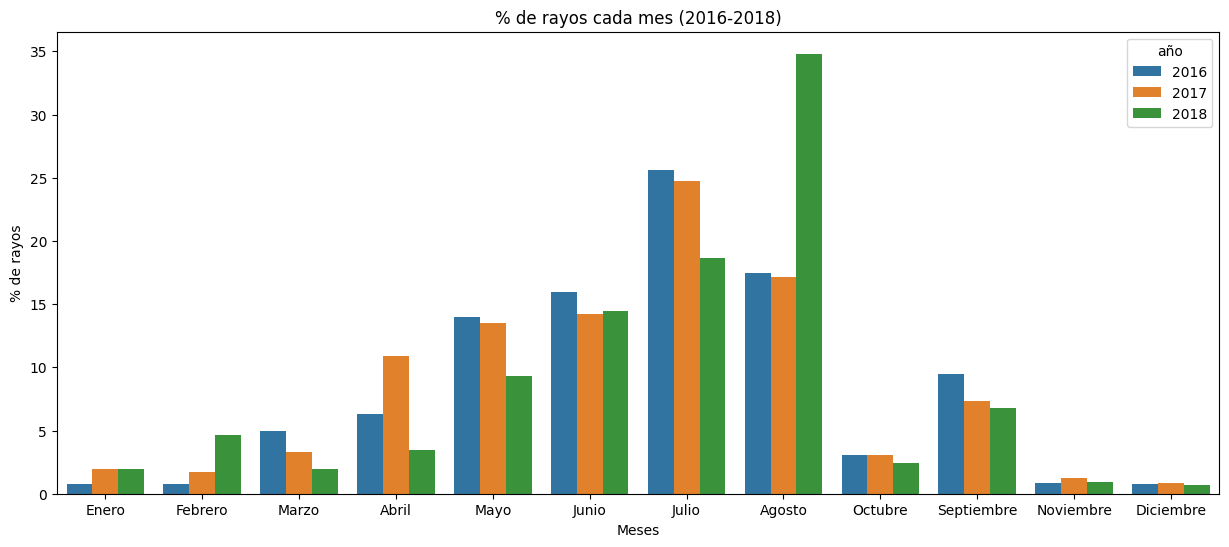

In [59]:
plt.figure(figsize=(15,6));

sns.barplot(
    data = porcentaje_de_rayos,
    x = 'mes_txt',
    y = 'porcentaje_de_rayos_por_mes',
    hue = 'año',
    order =  orden_mes
    )
plt.xlabel("Meses")
plt.ylabel("% de rayos")
plt.title("% de rayos cada mes (2016-2018)");

Para los tres años, hay un patrón claro a lo largo de cada año. Un mes destaca: agosto. Más de un tercio de los rayos ocurrieron en agosto en 2018.